(demo_notebooks:measurement:intensity_on_surfaces)=

# Measureing intensity on a surface

This example shows how to measure the intensity of a surface. The surface is defined by a set of points(vertices) and a set of triangles. The intensity is measured by averaging the intensity along the normal vectors of the vertices.

In [40]:
from napari_stress import sample_data, reconstruction, measurements, vectors, sample_data
import numpy as np
import napari
import vedo
from skimage import transform

## Example data

We first need to create a surface. In this tutorial, we take the 3d image of the 4d droplet sample dataset and quickly reconstruct a surface from it using the [droplet reconstruction toolbox](toolboxes:droplet_reconstruction:from_code).

In [2]:
viewer = napari.Viewer(ndisplay=3)

Assistant skips harvesting pyclesperanto as it's not installed.
Assistant skips harvesting pyclesperanto_prototype as it's not installed.


In [42]:
points = sample_data.get_droplet_point_cloud()[0]
droplet4d = sample_data.get_droplet_4d()[0]
scale = droplet4d[1]['scale'][1:]

droplet = droplet4d[0][0]
droplet = transform.rescale(droplet, scale, anti_aliasing=True)

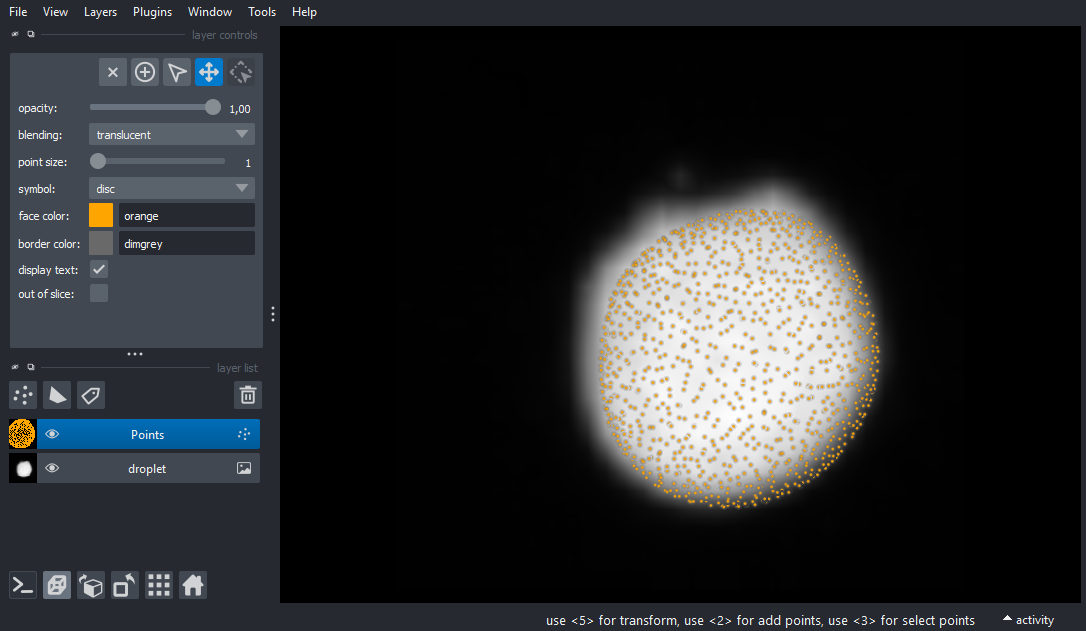

In [44]:
viewer.layers.clear()
viewer.add_image(droplet, name='droplet')
viewer.add_layer(napari.layers.Layer.create(*points))
napari.utils.nbscreenshot(viewer)

We now create surface from the reconstructed points:

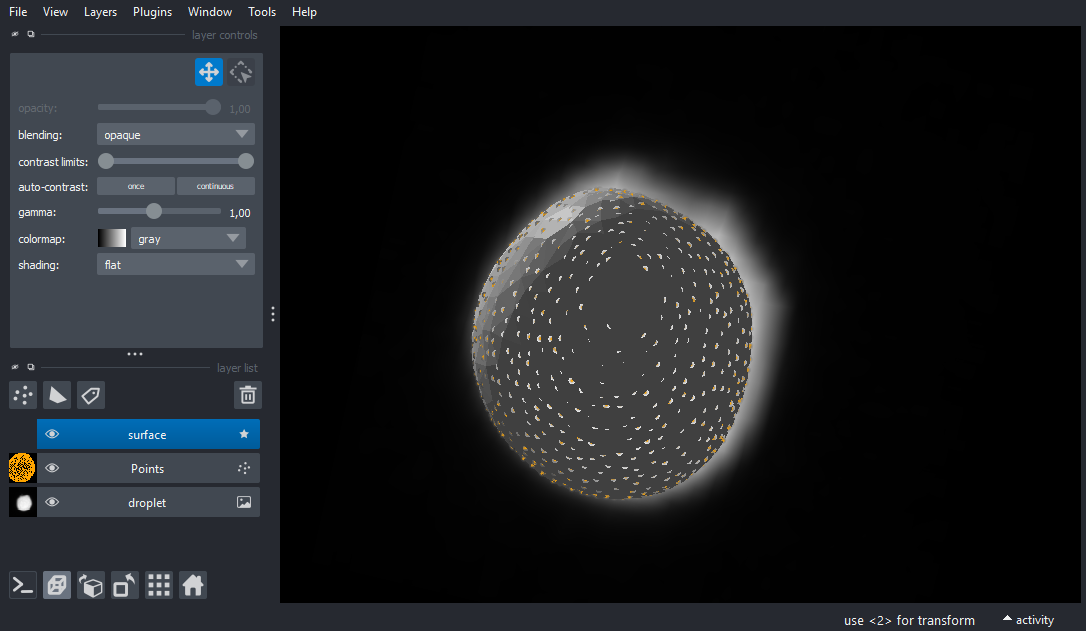

In [46]:
pointcloud_vedo = vedo.Points(points[0][:, 1:])
surface_vedo = pointcloud_vedo.reconstruct_surface().smooth(niter=50).decimate(fraction=0.01)
surface = (surface_vedo.vertices, np.asarray(surface_vedo.cells))
viewer.add_surface(surface, name='surface', blending='opaque')
napari.utils.nbscreenshot(viewer)

We now measure intensity on the surface. The measured values are simply the intensities on the surface. We can add some more metrics (mean, std, min, max) to results:

In [47]:
measured_intensities = measurements.measure_intensity_on_surface(surface,
                                                                 droplet,
                                                                 measurement_range = 3,
                                                                 sampling_distance=0.5, interpolation_method='linear')

intensity_mean = measured_intensities.mean(axis=1)
intensity_std = measured_intensities.std(axis=1)
intensity_max = measured_intensities.max(axis=1)
intensity_min = measured_intensities.min(axis=1)

measured_intensities['intensity_mean'] = intensity_mean
measured_intensities['intensity_std'] = intensity_std
measured_intensities['intensity_max'] = intensity_max
measured_intensities['intensity_min'] = intensity_min
measured_intensities

,step_0,step_1,step_2,step_3,step_4,step_5,intensity_mean,intensity_std,intensity_max,intensity_min
0,0.331049,0.414606,0.497417,0.580326,0.648891,0.667630,0.523320,0.133642,0.667630,0.331049
1,0.382389,0.455524,0.528822,0.602113,0.627379,0.645631,0.540310,0.104645,0.645631,0.382389
2,0.348877,0.422235,0.481675,0.538292,0.592035,0.627899,0.501835,0.105353,0.627899,0.348877
3,0.347693,0.412790,0.477218,0.540746,0.584013,0.600044,0.493751,0.099815,0.600044,0.347693
4,0.332954,0.408572,0.473742,0.536397,0.596677,0.637521,0.497644,0.115328,0.637521,0.332954
...,...,...,...,...,...,...,...,...,...,...
382,0.058715,0.077971,0.139337,0.204018,0.292200,0.385238,0.192913,0.127327,0.385238,0.058715
383,0.052107,0.077134,0.121162,0.196388,0.281357,0.383745,0.185316,0.128284,0.383745,0.052107
384,0.059532,0.086790,0.139312,0.214852,0.304453,0.407926,0.202144,0.134586,0.407926,0.059532
385,0.046520,0.066307,0.117432,0.184905,0.270279,0.365379,0.175137,0.124142,0.365379,0.046520


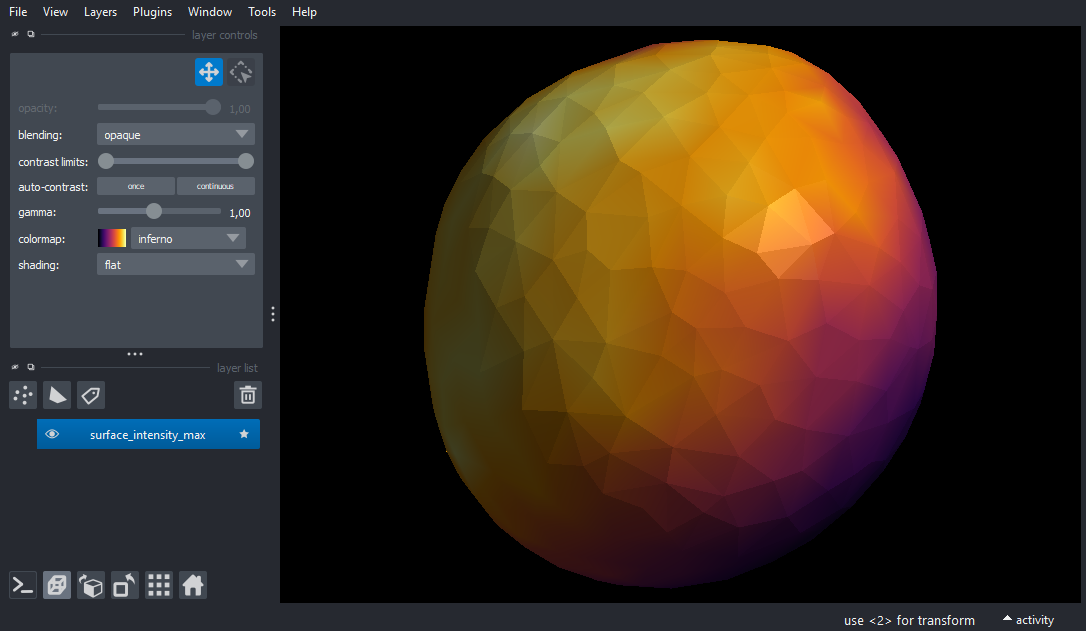

In [51]:
viewer.layers.clear()
viewer.add_surface((surface[0], surface[1], measured_intensities['intensity_max'].values),
                   name='surface_intensity_max', colormap='inferno', blending='opaque')
napari.utils.nbscreenshot(viewer)